## Cluster: tSNE complete linkage

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from time import time
from scipy import ndimage
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
sns.set(font_scale=1.8)

--------------

In [3]:
data = pd.read_csv('../../datareader/score/score.csv')
data.index = data['Protein']
ndf = data.drop('Protein',axis =1)

In [4]:
ndf.head()

,ARR,CHD,CM,CVA,IHD,VD
Protein,,,,,,
alpha-1-antitrypsin,0.009000,0.120724,0.036423,0.047402,0.103137,0.023655
mothers_against_decapentaplegic_homolog_4,0.005316,0.080604,0.056011,0.010512,0.039842,0.000000
vascular_endothelial_growth_factor_b,0.000000,0.006129,0.073377,0.028607,0.121075,0.000000
"indoleamine_2,3-dioxygenase_1",0.000000,0.000000,0.000000,0.000000,0.034477,0.000000
thyroxine-binding_globulin,0.000000,0.036206,0.020516,0.006959,0.048815,0.024457


### Which is Maximum

In [5]:
mdata = ndf.copy(deep =True)
dis = ['ARR', 'CHD', 'CM', 'CVA', 'IHD', 'VD']
idx = list(mdata.index)
nmax = []
for item in idx:
    data = mdata.loc[item,:]
    lst = [data[0],data[1],data[2],data[3],data[4],data[5]]
    m = max(lst)
    for d,e in zip(dis,lst):
        if e == m:
            nmax.append(d)
   

## Cluster-Aglo: Complete

In [6]:
tdata =ndf.copy(deep =True)

In [7]:
X = np.array(tdata)

In [8]:
linkg = 'average'

### Build the Manifold

In [9]:
# 2D embedding of the digits dataset
print("Computing embedding")
Xtsne = manifold.TSNE(n_components=2).fit_transform(X)
x_min, x_max = np.min(Xtsne, axis=0), np.max(Xtsne, axis=0)
Xtsne = (Xtsne - x_min) / (x_max - x_min)
print("Done.")

Computing embedding
Done.


In [10]:
Xtsne

array([[0.58949834, 0.7531166 ],
       [0.60703075, 0.74036276],
       [0.29339787, 0.49895537],
       ...,
       [0.49842042, 0.57060444],
       [0.97006494, 0.53362143],
       [0.02934294, 0.732129  ]], dtype=float32)

### Results

In [11]:
def plot_clustering(Xtsne, labels, title=None):
    myclc = ['mediumslateblue','deepskyblue','firebrick','navy','green','darkgoldenrod']
    Color = []
    X = []
    Y = []
    plt.figure(figsize=(15, 12))
    for i in range(Xtsne.shape[0]):
        plt.text(Xtsne[i, 0], Xtsne[i, 1], str(labels[i]),
                 color= myclc[labels[i]],
                 fontdict={'weight': 'bold', 'size': 12})
        Color.append(myclc[labels[i]])
        X.append(Xtsne[i, 0])
        Y.append(Xtsne[i, 1])

    if title is not None:
        plt.title(title, size=20)
    plt.axis([-0.25, 1.25, -0.25, 1.25])
    
    #plt.axhline(y=0, color='k')
    #plt.axvline(x=0, color='k')
    
    plt.xlabel('dimension 1', fontsize =20)
    plt.ylabel('dimension 2',fontsize =20)
    plt.grid(True)
    plt.tight_layout()
    return X,Y,Color

---------------

In [12]:
myclc = ['mediumslateblue','deepskyblue','firebrick','navy','green','darkgoldenrod']

average : 0.29s


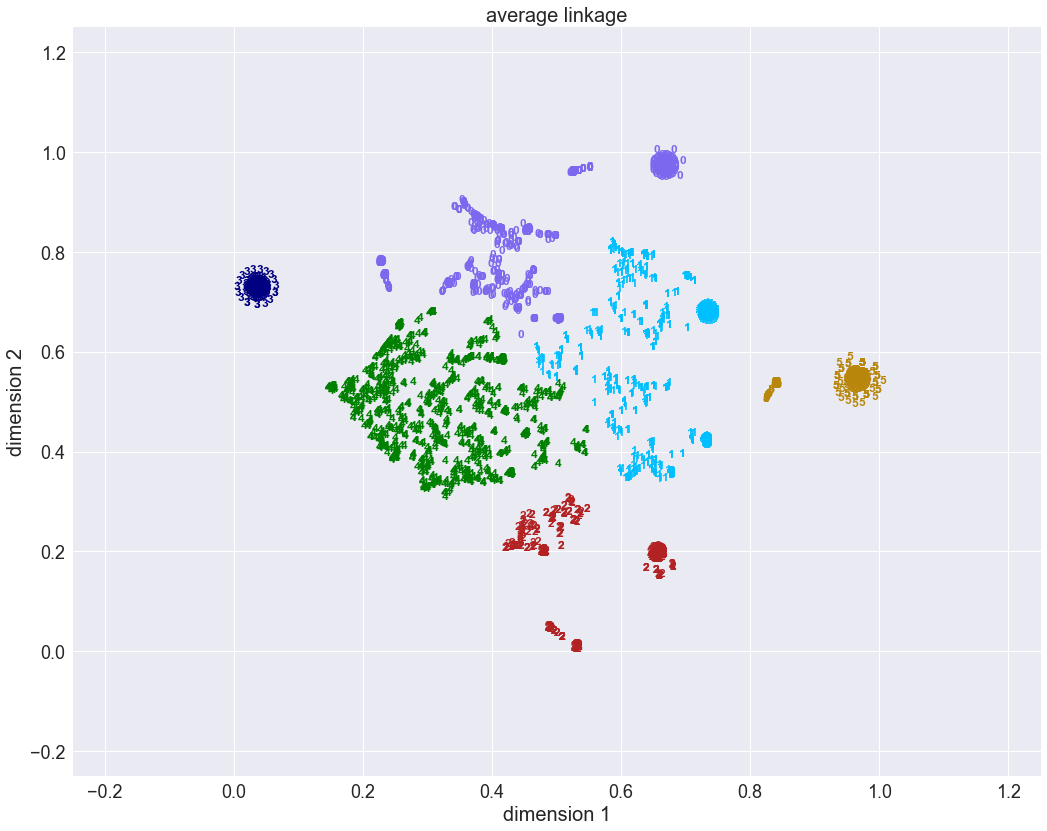

In [13]:
clustering = AgglomerativeClustering(linkage=linkg,n_clusters=6)

t0 = time()
clustering.fit(Xtsne)
print("%s : %.2fs" % (linkg, time() - t0))


X,Y,Color = plot_clustering(Xtsne, clustering.labels_,"%s linkage" % linkg)
plt.savefig('average/'+linkg+'.png')
plt.show()

In [14]:
len(clustering.labels_)

2702

In [15]:
resultdf = ndf.copy(deep =True)

In [16]:
resultdf['label'] = list(clustering.labels_)
resultdf['color'] = Color
resultdf['nmax'] = nmax
resultdf['X'] = X
resultdf['Y'] = Y

In [17]:
resultdf.head(5)

,ARR,CHD,CM,CVA,IHD,VD,label,color,nmax,X,Y
Protein,,,,,,,,,,,
alpha-1-antitrypsin,0.009000,0.120724,0.036423,0.047402,0.103137,0.023655,1,deepskyblue,CHD,0.589498,0.753117
mothers_against_decapentaplegic_homolog_4,0.005316,0.080604,0.056011,0.010512,0.039842,0.000000,1,deepskyblue,CHD,0.607031,0.740363
vascular_endothelial_growth_factor_b,0.000000,0.006129,0.073377,0.028607,0.121075,0.000000,4,green,IHD,0.293398,0.498955
"indoleamine_2,3-dioxygenase_1",0.000000,0.000000,0.000000,0.000000,0.034477,0.000000,5,darkgoldenrod,IHD,0.949800,0.544562
thyroxine-binding_globulin,0.000000,0.036206,0.020516,0.006959,0.048815,0.024457,4,green,IHD,0.399345,0.635551


------------

### Add UNiprot

In [18]:
data = pd.read_csv('uniprot.csv')
data.index = data['protein']
udf = data.drop('protein',axis =1)
udf.head()

,uniprot_id,gene_names,has_multiple_IDs
protein,,,
natriuretic_peptides_b,P16860,NPPB,NaN
angiotensin-converting_enzyme,P12821,ACE DCP DCP1,NaN
potassium_voltage-gated_channel_subfamily_h_member_2,Q12809,KCNH2 ERG ERG1 HERG,NaN
c-reactive_protein,P02741,CRP PTX1,NaN
apolipoprotein_e,P02649,APOE,NaN


In [19]:
idx_cvd = list(resultdf.index)
idx_uprt =  list(udf.index)

uprot = []
for item in idx_cvd:
    if item in idx_uprt:
        uprot.append(udf.loc[item,:][0])
    else:
        print(item,'Match not Found')
        uprot.append('NAN')   

collectrin Match not Found
aldo-keto_reductase_family_1_member_c4 Match not Found
macrophage_receptor_marco Match not Found
zinc_fingers_and_homeoboxes_protein_2 Match not Found
transcription_factor_sp3 Match not Found
synaptotagmin-9 Match not Found
e3_ubiquitin-protein_ligase_nrdp1 Match not Found
nuclear_factor_erythroid_2-related_factor_1 Match not Found
serine/threonine-protein_phosphatase_2b_catalytic_subunit_gamma_isoform Match not Found
myocyte-specific_enhancer_factor_2a Match not Found
neuropeptide_s_receptor Match not Found
fidgetin Match not Found
histone_deacetylase_6 Match not Found
transcription_factor_sox-2 Match not Found
voltage-gated_potassium_channel_subunit_beta-1 Match not Found
segment_polarity_protein_dishevelled_homolog_dvl-3 Match not Found
mitochondrial_intermediate_peptidase Match not Found
gtp-binding_protein_rit1 Match not Found
oligodendrocyte_transcription_factor_1 Match not Found
ets_homologous_factor Match not Found
troponin_t,_slow_skeletal_muscle Mat

In [20]:
resultdf['uprot'] = uprot
resultdf.head(10)

,ARR,CHD,CM,CVA,IHD,VD,label,color,nmax,X,Y,uprot
Protein,,,,,,,,,,,,
alpha-1-antitrypsin,0.009000,0.120724,0.036423,0.047402,0.103137,0.023655,1,deepskyblue,CHD,0.589498,0.753117,P01009
mothers_against_decapentaplegic_homolog_4,0.005316,0.080604,0.056011,0.010512,0.039842,0.000000,1,deepskyblue,CHD,0.607031,0.740363,Q13485
vascular_endothelial_growth_factor_b,0.000000,0.006129,0.073377,0.028607,0.121075,0.000000,4,green,IHD,0.293398,0.498955,P49765
"indoleamine_2,3-dioxygenase_1",0.000000,0.000000,0.000000,0.000000,0.034477,0.000000,5,darkgoldenrod,IHD,0.949800,0.544562,P14902
thyroxine-binding_globulin,0.000000,0.036206,0.020516,0.006959,0.048815,0.024457,4,green,IHD,0.399345,0.635551,P05543
smoothelin,0.000000,0.010463,0.000000,0.020742,0.092131,0.013016,4,green,IHD,0.262940,0.600811,P53814
"short-chain_specific_acyl-coa_dehydrogenase,_mitochondrial",0.000000,0.000000,0.023999,0.000000,0.022102,0.000000,2,firebrick,CM,0.658054,0.193892,P16219
protein_tyrosine_phosphatase_type_iva_1,0.030680,0.000000,0.022076,0.000000,0.000000,0.000000,1,deepskyblue,ARR,0.580443,0.468921,Q93096
"creatine_kinase_u-type,_mitochondrial",0.007622,0.000000,0.017123,0.000000,0.341386,0.000000,4,green,IHD,0.147972,0.526543,P12532


In [21]:
resultdf.to_csv('average/'+linkg+ '.csv')

In [22]:
df0 = resultdf[resultdf['label']==0]
df0.to_csv('average/'+linkg+ '0.csv')
df1 = resultdf[resultdf['label']==1]
df1.to_csv('average/'+linkg+ '1.csv')
df2 = resultdf[resultdf['label']==2]
df2.to_csv('average/'+linkg+ '2.csv')
df3 = resultdf[resultdf['label']==3]
df3.to_csv('average/'+linkg+ '3.csv')
df4 = resultdf[resultdf['label']==4]
df4.to_csv('average/'+linkg+ '4.csv')
df5 = resultdf[resultdf['label']==5]
df5.to_csv('average/'+linkg+ '5.csv')

In [23]:
df0.shape

(519, 12)

### Seperate cluster plots

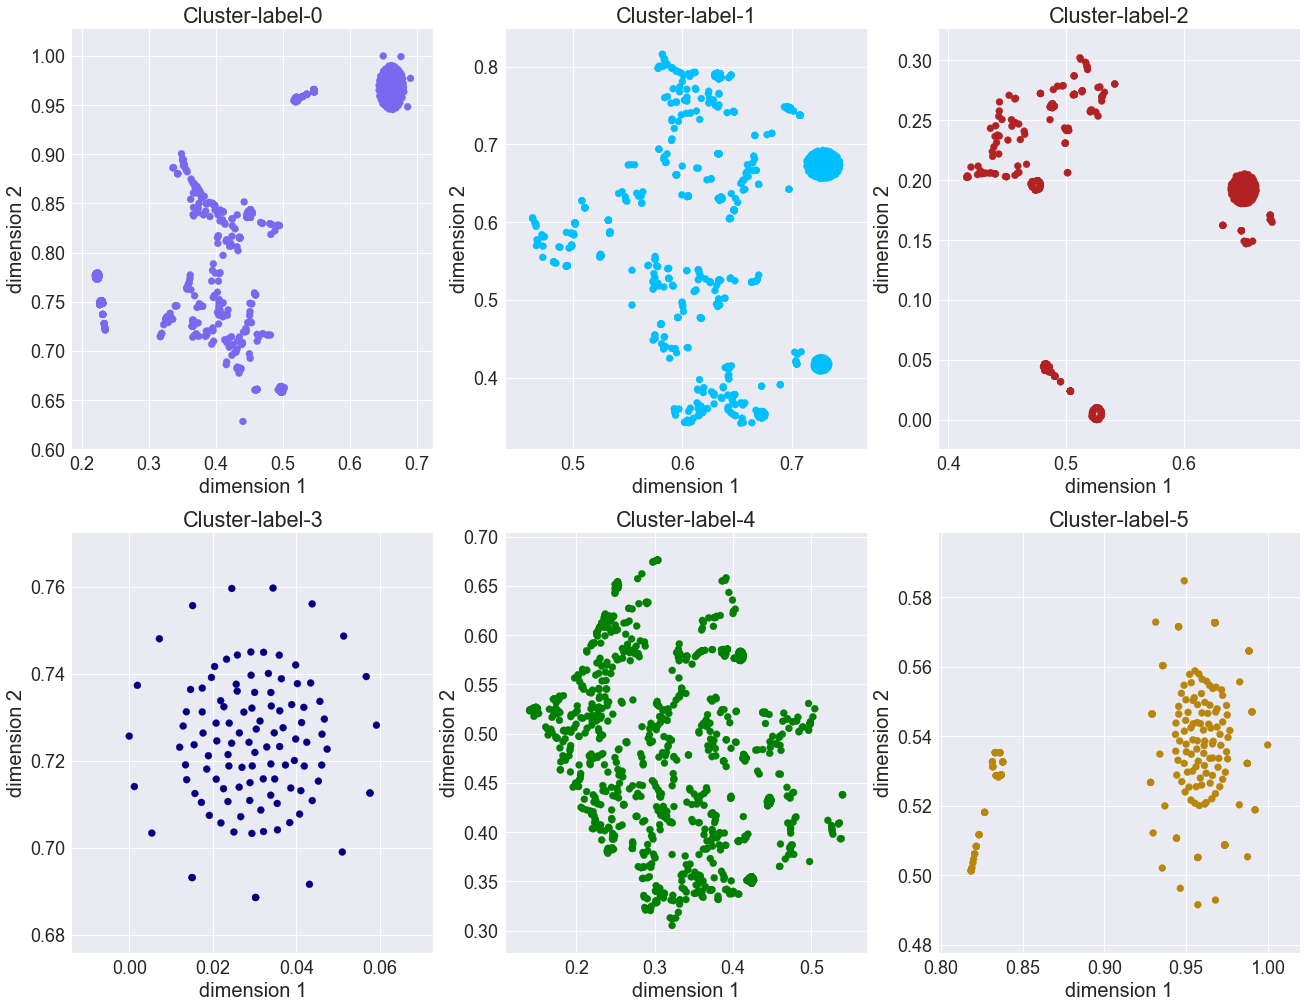

In [24]:
plt.figure(figsize = [22,17])
plt.subplot(2,3,1)
plt.scatter(df0['X'],df0['Y'],color=df0['color'])
plt.title('Cluster-label-0')
plt.xlabel('dimension 1', fontsize =20)
plt.ylabel('dimension 2',fontsize =20)
plt.subplot(2,3,2)
plt.scatter(df1['X'],df1['Y'],color=df1['color'])
plt.title('Cluster-label-1')
plt.xlabel('dimension 1', fontsize =20)
plt.ylabel('dimension 2',fontsize =20)
plt.subplot(2,3,3)
plt.scatter(df2['X'],df2['Y'],color=df2['color'])
plt.title('Cluster-label-2')
plt.xlabel('dimension 1', fontsize =20)
plt.ylabel('dimension 2',fontsize =20)
plt.subplot(2,3,4)
plt.scatter(df3['X'],df3['Y'],color=df3['color'])
plt.title('Cluster-label-3')
plt.xlabel('dimension 1', fontsize =20)
plt.ylabel('dimension 2',fontsize =20)
plt.subplot(2,3,5)
plt.scatter(df4['X'],df4['Y'],color=df4['color'])
plt.title('Cluster-label-4')
plt.xlabel('dimension 1', fontsize =20)
plt.ylabel('dimension 2',fontsize =20)
plt.subplot(2,3,6)
plt.scatter(df5['X'],df5['Y'],color=df5['color'])
plt.title('Cluster-label-5')
plt.xlabel('dimension 1', fontsize =20)
plt.ylabel('dimension 2',fontsize =20)
plt.savefig('average/'+linkg+'-subplot.png')
plt.show()

### Cluster In deep

In [25]:
resultdf.groupby('label').count()

,ARR,CHD,CM,CVA,IHD,VD,color,nmax,X,Y,uprot
label,,,,,,,,,,,
0,519,519,519,519,519,519,519,519,519,519,519
1,676,676,676,676,676,676,676,676,676,676,676
2,287,287,287,287,287,287,287,287,287,287,287
3,112,112,112,112,112,112,112,112,112,112,112
4,911,911,911,911,911,911,911,911,911,911,911
5,197,197,197,197,197,197,197,197,197,197,197


In [26]:
df0.head(10)

,ARR,CHD,CM,CVA,IHD,VD,label,color,nmax,X,Y,uprot
Protein,,,,,,,,,,,,
sh3_and_multiple_ankyrin_repeat_domains_protein_3,0.00000,0.000000,0.000000,0.039151,0.000000,0.000000,0,mediumslateblue,CVA,0.654033,0.959608,Q9BYB0
endophilin-b1,0.00000,0.000000,0.000000,0.043899,0.000000,0.000000,0,mediumslateblue,CVA,0.516064,0.954616,Q9Y371
a_disintegrin_and_metalloproteinase_with_thrombospondin_motifs_12,0.00000,0.000000,0.000000,0.000000,0.062291,0.000000,0,mediumslateblue,IHD,0.230749,0.748474,P58397
cytokine_receptor_common_subunit_gamma,0.00000,0.000000,0.000000,0.039151,0.000000,0.000000,0,mediumslateblue,CVA,0.661077,0.969435,P31785
myelin_basic_protein,0.00000,0.007666,0.002121,0.349511,0.003877,0.003344,0,mediumslateblue,CVA,0.352625,0.888755,P02686
phosphate-regulating_neutral_endopeptidase,0.00000,0.000000,0.000000,0.000000,0.062291,0.000000,0,mediumslateblue,IHD,0.226173,0.747243,P78562
protein_z-dependent_protease_inhibitor,0.00000,0.000000,0.000000,0.065516,0.032020,0.000000,0,mediumslateblue,CVA,0.432626,0.801987,Q9UK55
ste20-like_serine/threonine-protein_kinase,0.00000,0.000000,0.000000,0.040786,0.000000,0.000000,0,mediumslateblue,CVA,0.545912,0.965827,Q9H2G2
tissue-type_plasminogen_activator,0.04285,0.013719,0.009599,0.330811,0.231620,0.006301,0,mediumslateblue,CVA,0.335407,0.886174,P00750


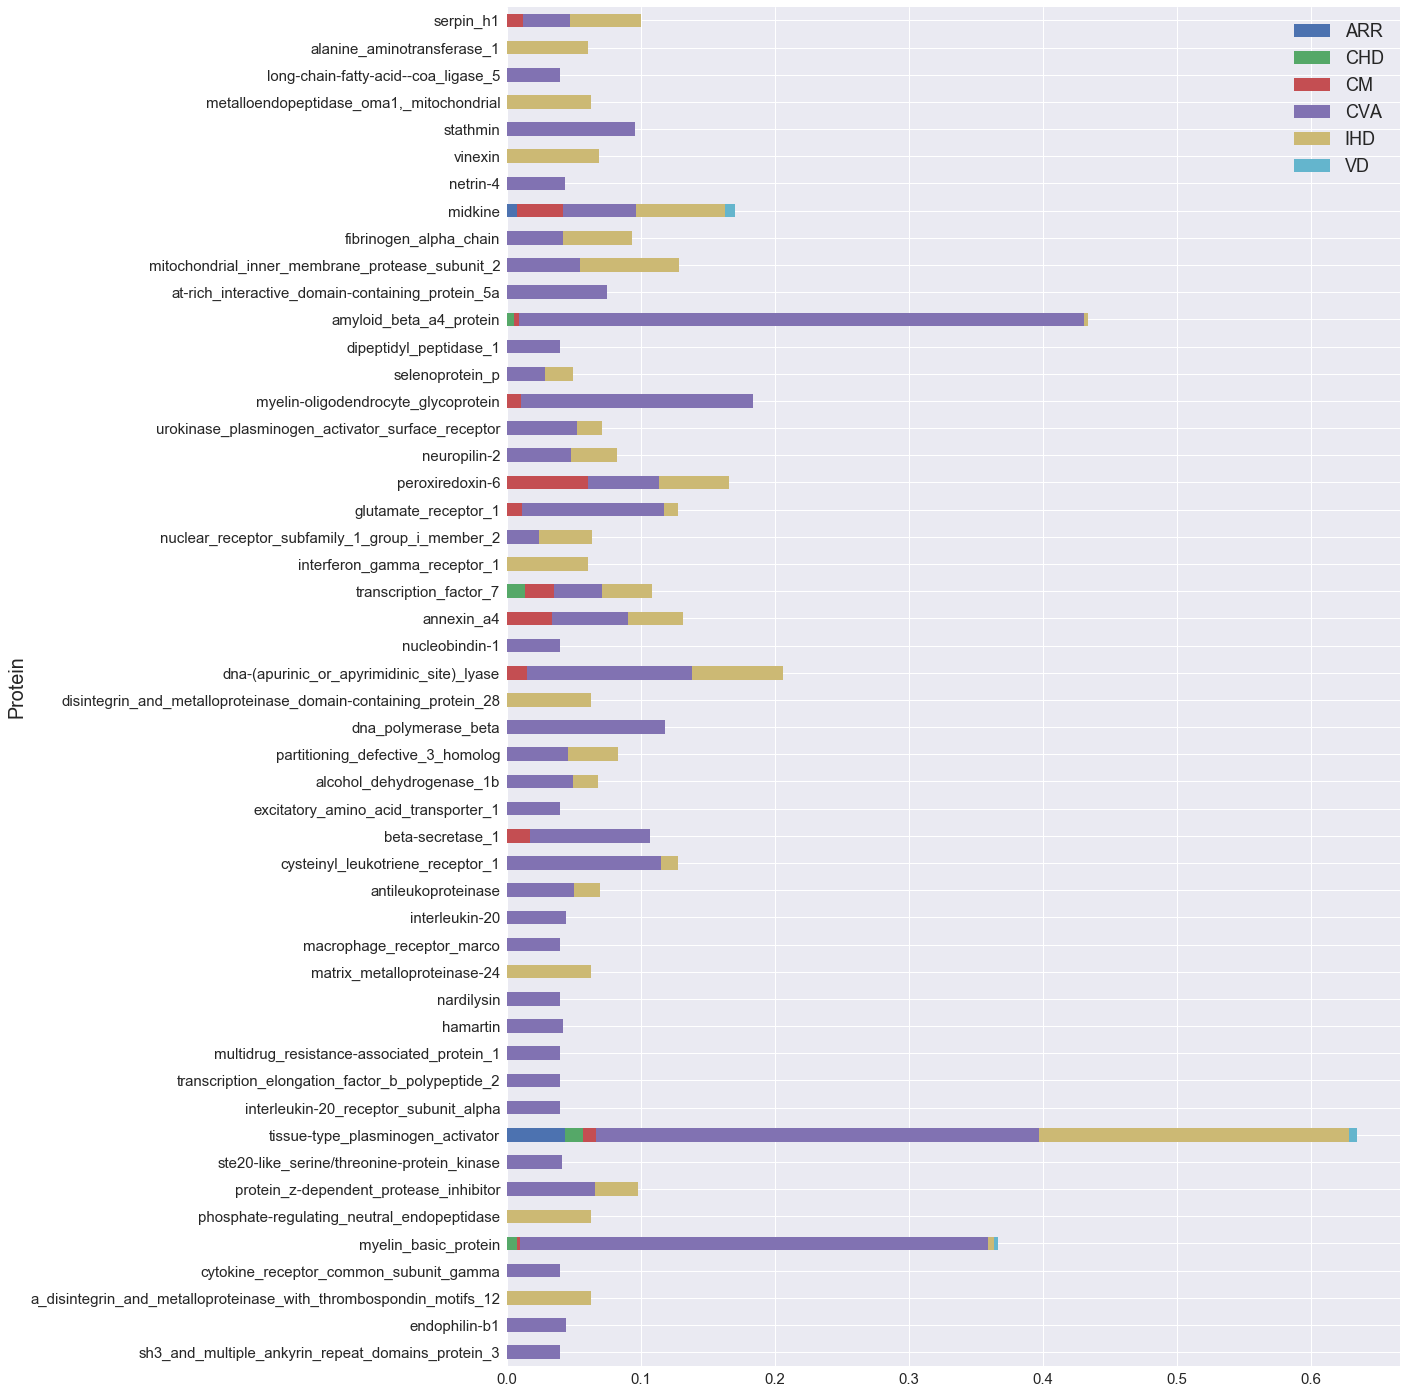

In [27]:
df0[0:50].drop(['X','Y','label'],axis =1).plot.barh(stacked=True,figsize=(16, 25),fontsize =15 )